# Scaling Exercises

In [1]:
## Import modules
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.preprocessing

from wrangle import wrangle_zillow


import warnings
warnings.filterwarnings("ignore")

In [2]:
# obtain datasets
train, validate, test = wrangle_zillow()

In [3]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1462930,3,2,1385,123859,1956,1553.44,6059
1842132,4,2,1567,251569,1946,3074.99,6037
869730,4,2,1910,762153,1958,8578.06,6059
1306111,3,2,2042,751716,1936,9122.39,6037
431629,3,2,1502,351732,1956,4343.63,6037


### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

<AxesSubplot:ylabel='Frequency'>

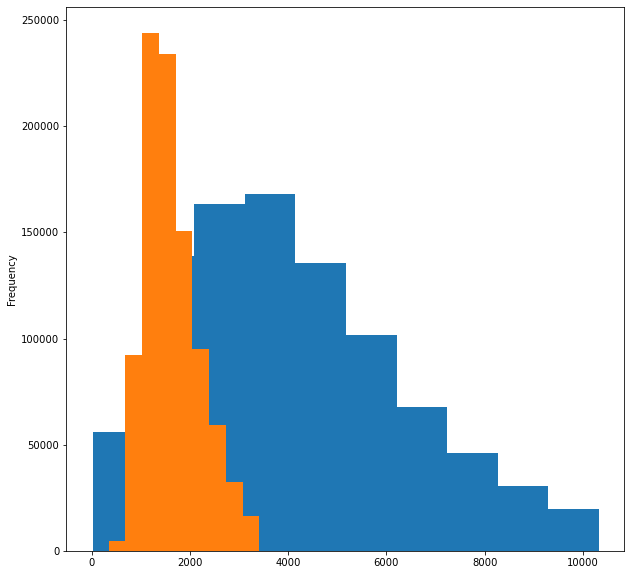

In [4]:
# observe two fields
plt.figure(figsize=(10,10))
# $ taxed
train.taxamount.plot.hist()
# sq ft
train.calculatedfinishedsquarefeet.plot.hist()

#### Min Max Scaler

In [5]:
## MinMaxScaler
scaler = sklearn.preprocessing.MinMaxScaler()

# Fit scaler to data
scaler.fit(train[['taxamount', 'calculatedfinishedsquarefeet']])

# Execute scaling
scaled_taxamount = scaler.transform(train[['taxamount', 'calculatedfinishedsquarefeet']])
scaled_taxamount[:10]

array([[0.14872225, 0.40598416],
       [0.29631444, 0.45937225],
       [0.83011887, 0.55998827],
       [0.88291954, 0.5987093 ],
       [0.41937405, 0.44030507],
       [0.60170431, 0.73100616],
       [0.30580892, 0.66324435],
       [0.63824855, 0.4860663 ],
       [0.58179384, 0.38926371],
       [0.77261559, 0.58990906]])

In [6]:
# Create new columns for scaled 
train[['taxamount_scaled', 'calculatedfinishedsquarefeet_scaled']] = scaled_taxamount

In [7]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,taxamount_scaled,calculatedfinishedsquarefeet_scaled
1462930,3,2,1385,123859,1956,1553.44,6059,0.148722,0.405984
1842132,4,2,1567,251569,1946,3074.99,6037,0.296314,0.459372
869730,4,2,1910,762153,1958,8578.06,6059,0.830119,0.559988
1306111,3,2,2042,751716,1936,9122.39,6037,0.882920,0.598709
431629,3,2,1502,351732,1956,4343.63,6037,0.419374,0.440305


<AxesSubplot:ylabel='Frequency'>

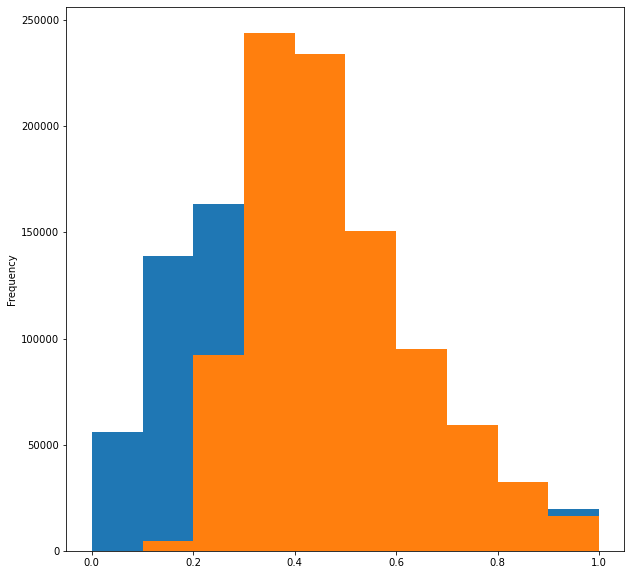

In [8]:
plt.figure(figsize=(10,10))
train.taxamount_scaled.plot.hist()
train.calculatedfinishedsquarefeet_scaled.plot.hist()

#### Standard Scaler

In [9]:
# Create standard scaler
scaler = sklearn.preprocessing.StandardScaler()

# fit scaler to column
scaler.fit(train[['taxvaluedollarcnt']])

# execute scaling
train['taxvaluedollarcnt_scaled'] = scaler.transform(train[['taxvaluedollarcnt']])
test['taxvaluedollarcnt_scaled'] = scaler.transform(test[['taxvaluedollarcnt']])
validate['taxvaluedollarcnt_scaled'] = scaler.transform(validate[['taxvaluedollarcnt']])

In [10]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,taxamount_scaled,calculatedfinishedsquarefeet_scaled,taxvaluedollarcnt_scaled
1462930,3,2,1385,123859,1956,1553.44,6059,0.148722,0.405984,-1.016402
1842132,4,2,1567,251569,1946,3074.99,6037,0.296314,0.459372,-0.371135
869730,4,2,1910,762153,1958,8578.06,6059,0.830119,0.559988,2.208638
1306111,3,2,2042,751716,1936,9122.39,6037,0.882920,0.598709,2.155904
431629,3,2,1502,351732,1956,4343.63,6037,0.419374,0.440305,0.134948


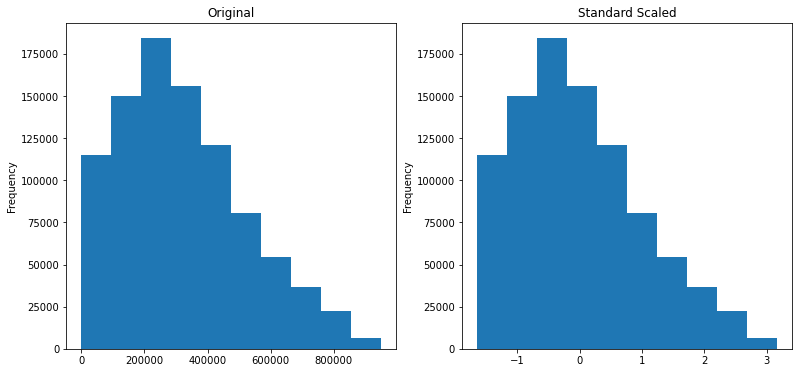

In [11]:
# plot both scaled and unscaled
plt.figure(figsize=(13, 6))

plt.subplot(121)
train.taxvaluedollarcnt.plot.hist(title='Original')

plt.subplot(122)
train.taxvaluedollarcnt_scaled.plot.hist(title='Standard Scaled');

#### Robust Scaler

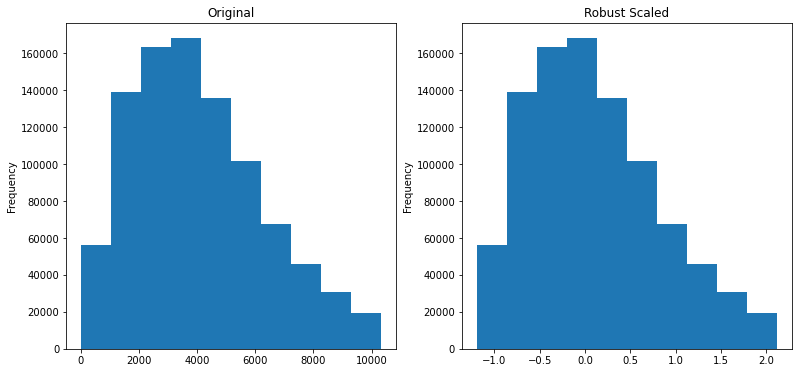

In [12]:
# create robust scaler
scaler = sklearn.preprocessing.RobustScaler()

# fit scaler to column
scaler.fit(train[['taxamount']])

# execute scaling
train['taxamount_scaled'] = scaler.transform(train[['taxamount']])
test['taxamount_scaled'] = scaler.transform(test[['taxamount']])
validate['taxamount_scaled'] = scaler.transform(validate[['taxamount']])

#plot the scaled and unscaled distributions
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.taxamount.plot.hist(title='Original')
plt.subplot(122)
train.taxamount_scaled.plot.hist(title='Robust Scaled');

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [13]:
# Create standard scaler
scaler = sklearn.preprocessing.StandardScaler()

# fit scaler to column
scaler.fit(train[['taxvaluedollarcnt']])

# execute scaling
train['taxvaluedollarcnt_scaled'] = scaler.transform(train[['taxvaluedollarcnt']])
test['taxvaluedollarcnt_scaled'] = scaler.transform(test[['taxvaluedollarcnt']])
validate['taxvaluedollarcnt_scaled'] = scaler.transform(validate[['taxvaluedollarcnt']])

In [14]:
train['taxvaluedollarcnt_unscaled'] = scaler.inverse_transform(train.taxvaluedollarcnt_scaled)

In [15]:
train.head(3)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,taxamount_scaled,calculatedfinishedsquarefeet_scaled,taxvaluedollarcnt_scaled,taxvaluedollarcnt_unscaled
1462930,3,2,1385,123859,1956,1553.44,6059,-0.698768,0.405984,-1.016402,123859.0
1842132,4,2,1567,251569,1946,3074.99,6037,-0.210492,0.459372,-0.371135,251569.0
869730,4,2,1910,762153,1958,8578.06,6059,1.555480,0.559988,2.208638,762153.0


The inverse scaled column is the same value, but is now a float

### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [16]:
sklearn.preprocessing.QuantileTransformer?

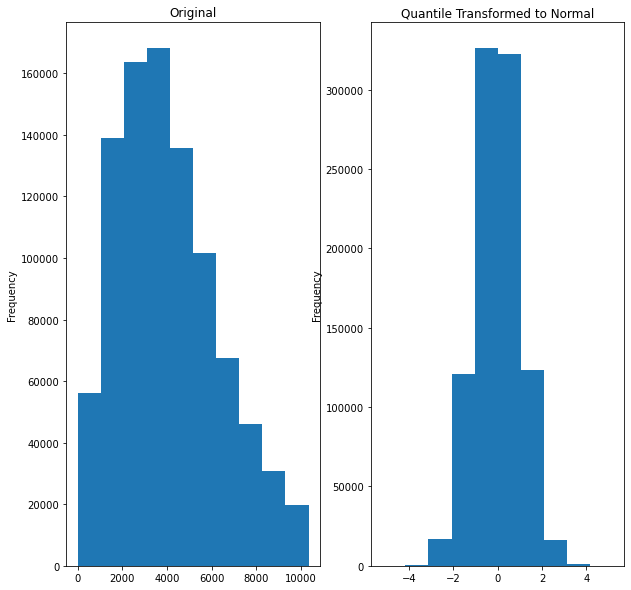

In [17]:
# create quantile transformer with normal for output_distribution
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

# fit scaler to column
scaler.fit(train[['taxamount']])

# execute scaling
train['taxamount_scaled'] = scaler.transform(train[['taxamount']])
test['taxamount_scaled'] = scaler.transform(test[['taxamount']])
validate['taxamount_scaled'] = scaler.transform(validate[['taxamount']])

#plot the scaled and unscaled distribution
plt.figure(figsize=(10,10))
plt.subplot(121)
train.taxamount.plot.hist(title='Original')
plt.subplot(122)
train.taxamount_scaled.plot.hist(title='Quantile Transformed to Normal');

### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

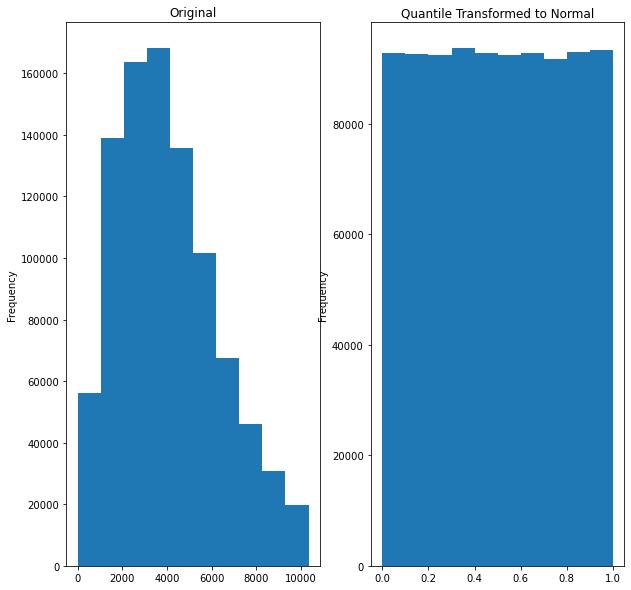

In [18]:
# create quantile transformer with default arguments
scaler = sklearn.preprocessing.QuantileTransformer()

# fit scaler to column
scaler.fit(train[['taxamount']])

# execute scaling
train['taxamount_scaled'] = scaler.transform(train[['taxamount']])
test['taxamount_scaled'] = scaler.transform(test[['taxamount']])
validate['taxamount_scaled'] = scaler.transform(validate[['taxamount']])

#plot the scaled and unscaled distribution
plt.figure(figsize=(10,10))
plt.subplot(121)
train.taxamount.plot.hist(title='Original')
plt.subplot(122)
train.taxamount_scaled.plot.hist(title='Quantile Transformed to Normal');

The normal argument creates a normal distrubution of the data while the default is a uniform distribution

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [19]:
# fresh dataset
train, validate, test = wrangle_zillow()

In [20]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1462930,3,2,1385,123859,1956,1553.44,6059
1842132,4,2,1567,251569,1946,3074.99,6037
869730,4,2,1910,762153,1958,8578.06,6059
1306111,3,2,2042,751716,1936,9122.39,6037
431629,3,2,1502,351732,1956,4343.63,6037


I will use minmax scaling to scale finished sqft with the taxamount and taxvaluedollarcnt

In [21]:
## MinMaxScaler
scaler = sklearn.preprocessing.MinMaxScaler()

# Fit scaler to data
scaler.fit(train[['taxamount', 'taxvaluedollarcnt', 'calculatedfinishedsquarefeet']])

# Execute scaling
train[['taxamount_scaled', 'taxvaluedollarcnt_scaled', 'calculatedfinishedsquarefeet_scaled']] = scaler.transform(train[['taxamount', 'taxvaluedollarcnt', 'calculatedfinishedsquarefeet']])
validate[['taxamount_scaled', 'taxvaluedollarcnt_scaled', 'calculatedfinishedsquarefeet_scaled']] = scaler.transform(validate[['taxamount', 'taxvaluedollarcnt', 'calculatedfinishedsquarefeet']])
test[['taxamount_scaled', 'taxvaluedollarcnt_scaled', 'calculatedfinishedsquarefeet_scaled']] = scaler.transform(test[['taxamount', 'taxvaluedollarcnt', 'calculatedfinishedsquarefeet']])

<AxesSubplot:ylabel='Frequency'>

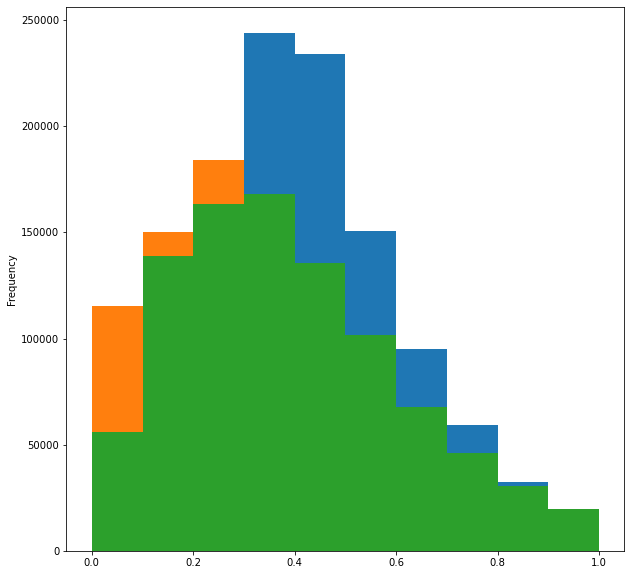

In [22]:
plt.figure(figsize=(10,10))
train.calculatedfinishedsquarefeet_scaled.plot.hist()
train.taxvaluedollarcnt_scaled.plot.hist()
train.taxamount_scaled.plot.hist()

In [23]:
def scale_zillow(train, validate, test):
    '''
    Takes train, validate, test datasets as an argument and returns the dataframes with
    taxamount, taxvaluedollarcnt, and calculatedfinishedsquarefeet scaled columns.
    '''
    ## MinMaxScaler
    scaler = sklearn.preprocessing.MinMaxScaler()

    # Fit scaler to data
    scaler.fit(train[['taxamount', 'taxvaluedollarcnt', 'calculatedfinishedsquarefeet']])

    # Execute scaling
    train[['taxamount_scaled', 'taxvaluedollarcnt_scaled', 'calculatedfinishedsquarefeet_scaled']] = scaler.transform(train[['taxamount', 'taxvaluedollarcnt', 'calculatedfinishedsquarefeet']])
    validate[['taxamount_scaled', 'taxvaluedollarcnt_scaled', 'calculatedfinishedsquarefeet_scaled']] = scaler.transform(validate[['taxamount', 'taxvaluedollarcnt', 'calculatedfinishedsquarefeet']])
    test[['taxamount_scaled', 'taxvaluedollarcnt_scaled', 'calculatedfinishedsquarefeet_scaled']] = scaler.transform(test[['taxamount', 'taxvaluedollarcnt', 'calculatedfinishedsquarefeet']])
    return train, validate, test

## Added to wrangle.py

In [35]:
### test function from module
from wrangle import scale_zillow

train, validate, test = wrangle_zillow()
train, validate, test = scale_zillow(train, validate, test)


In [36]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,taxamount_scaled,taxvaluedollarcnt_scaled,calculatedfinishedsquarefeet_scaled
1462930,3,2,1385,123859,1956,1553.44,6059,0.148722,0.130229,0.405984
1842132,4,2,1567,251569,1946,3074.99,6037,0.296314,0.264531,0.459372
869730,4,2,1910,762153,1958,8578.06,6059,0.830119,0.801469,0.559988
1306111,3,2,2042,751716,1936,9122.39,6037,0.882920,0.790493,0.598709
431629,3,2,1502,351732,1956,4343.63,6037,0.419374,0.369864,0.440305
